# Women's Clothing E-Commerce Reviews

Written on the 29th of august, 2022. <br>
Edgardo Kennedy


This project consists of some exploratory data analysis followed by the training of some natural language processing models. We approach this with two objectives. First, we try to predict if a review left on an item's page will be influential on other customers from its title and text. Second, we train a model to predict whether a reviewer will, in the end, recommend the item they purchased. <br>

Predicting a review's influence would be valuable to any retailer, because they could float possibly useful reviews to the top of an item's page to create a better user experience without waiting for that review to get the necessary engagement to reach that spot. It would also provide insight as to what types of issues actually cause people to reconsider their purchase so they can be addressed. Finally, a more sly application of a model of this nature would be to hide potentially influential negative reviews, or highlight influential postive reviews. <br>

Determining if a review recommends the item or not is easier to do than predicting influence. On this dataset, users were required to chose whether or not they recommend the item they bought so the retailer would have that information anyways. This doesn't mean that training this model is useless, but rather it can help as a possible filter. In particular, it would be interesting to see where the model gets its predictions wrong. A wrong prediction would happen on a review that says positive things about the item but ultimately doesn't recommend others buy it or, on the flipside, says negative things about the item but recommends it anyways. This behavior indicates that the reviewer is acting in good faith and possibly has some constructive criticism that the company can use to improve their products. This way, a large retailer could wade through thousands of reviews and only keep those that provide valuable insight, saving time and effort. <br>

On top of these constructive reviews being useful to the retailer, they would also prove useful to the customers, as they would most likely contain commentary on the nature of the product and its quality. This way the company could provide a better user experience by floating these reviews to the top as well.

This dataset has the next information:
- __Clothing ID__: Refers to the ID of the specific item of clothing being reviewed
- __Age__: Age of the person posting the review
- __Title__: Title of the review, if there is one
- __Review Text__: Text of the review
- __Rating__: Ratings on a 1-to-5 scale
- __Recommended IND__: Binary value on whether they recommend the item
- __Positive Feedback Count__: Count of how many users found the review 'positive'* 
- __Division Name__: Refers to whether the item is general, general petite or intimates
- __Department Name__: Refers to the item type more specifically: tops, bottoms, dresses, etc.
- __Class Name__: Refers to even more specific classifications: Blouses, Sweaters, Jackets, etc.


*The source of this dataset doesn't actually explain what Positive Feedback Count would be, so we are working under the assumption that this represents how many 'Likes' a review gets, but really we're just guessing

Dataset source: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews <br>
(Accessed on the 29th of august, 2022) <br>


This project consists of the following:

- First we retrieve our data and clean it
    - Luckily, not much cleaning is actually required 
- Then we do some exploratory data analysis to see if we can gleen anything about our data. This includes:
    - Studying the age of our users
    - Studying how long reviews are, in characters
    - Studying how long review titles are, in characters
    - Trying to determine if there is a relationship between title/review length and rating
- Next we try to determine if reviews are 'Impactful' or not from their Positive Feedback Count
- Moving from this data analysis, we train 4 different Natural Language Processing models:
    - A model that tries to predict if a review is impactful from its title
    - A model that tries to predict if a review recommends the item they purchased from its title
    - A model that tries to predict if a review is impactful from its review text
    - A model that tries to predict if a review recommends the item they purchased from its review text
   
In this Jupyter Notebook you can find not only all the code and the visualizations generated, but also a general step by step explanation of the logic used throughout and the conclusions we can come to from the results of the project. With that being said, here is a summarized list of the results achieved and the conclusions we can reach from them:

- Although we already knew this store caters to women, it seems that the demographic is primarily middle aged.
- Most reviews have very short or no title at all while the actual body of the review tends to be incredibly long
- Review title and text length seem to have a correlation to the rating a customer leaves. It seems that the longer a review is, the less likely it is to be a 5 star rating
- A vast majority of reviews have no Positive Feedback Count, which would mean that most reviews either go unread or simply don't provide any useful commentary.
    - We have no way of knowing which of these is correct, and this will prove to be a big problem. More information is needed
- On the results of the training of forecasting models:
    - There simply isn't enough information to reliably predict whether a review will have an impact on the viewer or not. Adding another variable like a review's view counter would help a lot and actually make this possible.
    - Using a forecasting model for filtering reviews to gather those with constructive criticism or useful information seems to be a success, as we were able to collect reviews that actually comment on why a piece should not be bought or things a customer should look out for like strange cuts, poor fabric quality or the item not looking like the picture on the website
    


## Data Retrieval and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#We read the dataset.
reviews_df = pd.read_csv('Womens_Clothing_E-Commerce_Reviews.csv', index_col = 0)
reviews_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Right on the first entry of the dataset we can see a missing value. We can find out more ahead.

In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


We are missing a fair amount of review texts and even more titles. We also happen to be missing some Division, Department and Class names, but very few. Before we engage in any exploratory data analysis, we will fill these null values in and add a couple more columns.

First we fill the missing spots for the Title and Review Text columns with empty strings. These empty spots don't represent a missing value so much as they represent a customer that didn't feel compelled to leave a written review after receiving their item. <br>

These empty strings will allow us to work with these columns more easily without fundamentally changing the data.

In [4]:
reviews_df['Title'].fillna(value = '', inplace = True)
reviews_df['Review Text'].fillna(value = '', inplace = True)

Now we will add two more columns. One for the length of the Title in characters and one for the length of the Review Text in characters.

In [5]:
reviews_df['Title Length'] = reviews_df['Title'].apply(len)
reviews_df['Review Length'] = reviews_df['Review Text'].apply(len)

A new look at the head of our dataset:

In [6]:
reviews_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Length,Review Length
0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0,53
1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,23,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,16,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,16,192


Now, looking at the Division Names we notice that we have 3 divisions, with one of them misspelled as 'Initmates':

In [7]:
print(reviews_df['Division Name'].unique())

['Initmates' 'General' 'General Petite' nan]


This typo is easily fixed:

In [8]:
reviews_df.loc[reviews_df['Division Name'] == 'Initmates', 'Division Name'] = 'Intimates'

In the Department Names we have 6 types:

In [9]:
print(reviews_df['Department Name'].unique())

['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]


And in the Class Names we have 20 types:

In [10]:
print(reviews_df['Class Name'].unique())

['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']


Now that we know the Division, Department and Class names are fine, we can check the items that don't have values in these columns:

In [11]:
reviews_df[(reviews_df['Division Name'].isnull()) |
          (reviews_df['Department Name'].isnull()) |
          (reviews_df['Class Name'].isnull())]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Length,Review Length
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN,20,308
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN,8,241
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN,15,106
13787,492,48,,,5,1,0,NaN,NaN,NaN,0,0
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN,13,49
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN,5,110
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN,15,162
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN,21,275
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN,13,97
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN,17,256


As you can see, there are only 14 out of 23,486 entries missing this information, a minuscule portion (less than 0.05%). Although accurately filling them in could by a fun exercise, a quick glance at their details shows that none of them are particularly impactful reviews, with the highest Positive Feedback Count in the group being 5, and there are no outliers in terms of review length or rating. Basically, leaving these values empty or dropping these entries altogether would have virtually no impact on the fidelity of our results. <br>

In this case we will just be deleting them:

In [12]:
index_null_department = reviews_df[(reviews_df['Division Name'].isnull()) |
          (reviews_df['Department Name'].isnull()) |
          (reviews_df['Class Name'].isnull())].index

reviews_df.drop(index_null_department, inplace = True)

## Exploratory Data Analysis

First, let us see if we can glimpse anything from a description of our data:

In [13]:
reviews_df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Title Length,Review Length
count,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000
mean,918.486665,43.200707,4.195552,0.822256,2.537151,15.999744,297.659168
std,202.727678,12.280913,1.110188,0.382305,5.703597,11.246124,152.567772
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,9.000000,173.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,15.000000,292.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,23.000000,451.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,52.000000,508.000000


Some interesting things to note:

- Our users are, on average, middle aged at 43 years old, with a standard deviation of 12 years
- Our oldest user is 99 years old, which is suspect for an online clothing store
- Our users seem to be mostly happy with their purchases, with the average product rating being 4.1 stars and the 25th percentile already at four stars
- Our average review length is 297 characters, which is a little over what a tweet allows. This seems fairly normal

Now we will briefly look at this website's userbase. Let's take a closer look at the age distribution of the people leaving these reviews:

Text(0.5, 0.98, 'Distribution of Users by Age')

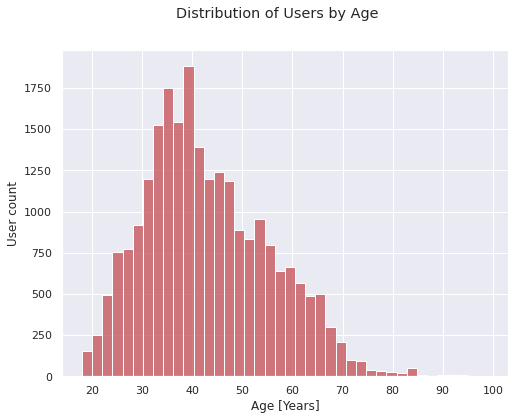

In [14]:
#First we set the style for our upcoming plots

#We create a histogram of the distribution of our users by their age
sns.set_theme(style = 'darkgrid')


fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'Age', 
             data = reviews_df, 
             color = 'r', 
             bins = 40, 
             palette = 'rocket_r')
ax.set_xlabel('Age [Years]')
ax.set_ylabel('User count')
fig.suptitle('Distribution of Users by Age')

In [15]:
#Through our histogram we can see that we have a lot of users over the age of 70.
#We can see a tally of the distribution of these users up ahead
print('Number of people of the age of 70: ', reviews_df[reviews_df['Age'] >= 70]['Age'].count())
print('\n')
print('Distribution of the ages of these users:')
print('Age | Count')
reviews_df[reviews_df['Age'] >= 70]['Age'].value_counts().sort_values(ascending = False)

Number of people of the age of 70:  473


Distribution of the ages of these users:
Age | Count


70    93
71    51
74    50
72    46
83    43
73    40
75    26
77    18
78    15
79    15
82    13
80    10
76    10
85     6
84     6
89     5
81     5
91     5
87     4
94     3
93     2
90     2
86     2
99     2
92     1
Name: Age, dtype: int64

In [16]:
#We can retrieve the data of our oldest users
reviews_df[reviews_df['Age'] == reviews_df['Age'].max()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Length,Review Length
8327,1078,99,Beachy and boho!,I love the weight of the material; sometimes c...,5,1,1,General,Dresses,Dresses,16,500
11545,949,99,,"Great quality, i didn't expect the neck to be ...",4,1,4,General,Tops,Sweaters,0,78


We can see that our audience is slightly skewed towards people over the age of 40. Furthermore, we can see that we have 473 users over the age of 70, 80 and even 90, with two users registered as being 99 years old. While this is within the realm of possibility, it's more likely that a lot of users are intentionally misreporting their age when using the site. After all, most websites have you self-reporting your age and don't ask for verification. This further skews our age data towards the older side.<br>

None of this means that we should change these (possibly) fake values. Ultimately, there will always be a segment of our userbase that will not be truthful with details like these and any model that ends up being deployed will have to deal with them regardless. <br>

Now we will study the Review and Title Lengths and try to determine if they have a relationship to Ratings or Positive Feedback Counts.

Text(0.5, 0.98, 'Distribution of Reviews by Review Length in number of characters')

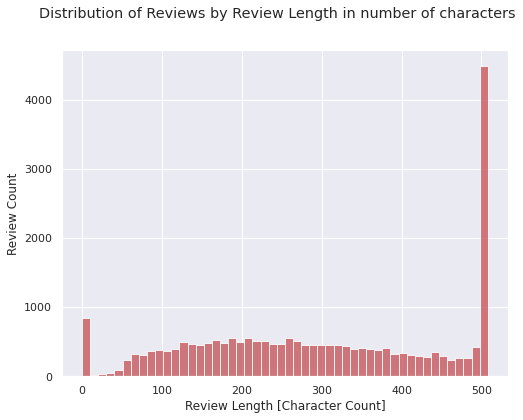

In [17]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'Review Length', 
             data = reviews_df, 
             palette = 'rocket',
             color = 'r', 
             bins = 50)
ax.set_xlabel('Review Length [Character Count]')
ax.set_ylabel('Review Count')
fig.suptitle('Distribution of Reviews by Review Length in number of characters')

There are a couple things to note here. First of all, because of all of the empty strings we added we can see a small spike at the 0 character count. Second, the review length seems to be evenly spread between 100 and 400 characters but then we see that a large number of our users left reviews with a length of around 500 characters.<br>

Let's see if there is a pattern in the actual numbers:

In [18]:
print('Number of reviews with a certain lenght in characters')
print('Length | No. of reviews')
reviews_df['Review Length'].value_counts()

Number of reviews with a certain lenght in characters
Length | No. of reviews


500    3061
0       844
499     807
502     448
495     138
       ... 
9         1
15        1
11        1
34        1
507       1
Name: Review Length, Length: 498, dtype: int64

We can see that the most common review length is exactly 500 characters. We also have some amount of people leaving reviews over 500 characters:

In [19]:
print('Number of reviews with a lenght over 500 characters')
print('Length | No. of reviews')
reviews_df[reviews_df['Review Length'] > 500]['Review Length'].value_counts()

Number of reviews with a lenght over 500 characters
Length | No. of reviews


502    448
501    109
504     34
503     10
506      2
508      2
505      1
507      1
Name: Review Length, dtype: int64

I believe that the explanation for this behaviour lies in the methodology that was used to compile this data. If we look at these long reviews themselves we can notice a pattern:

In [20]:
for i in range(4):
    print('Review Length: ', reviews_df[reviews_df['Review Length'] > 500]['Review Length'].iloc[i])
    print(reviews_df[reviews_df['Review Length'] > 500]['Review Text'].iloc[i])
    print('\n')

Review Length:  502
More and more i find myself reliant on the reviews written by savvy shoppers before me and for the most past, they are right on in their estimation of the product. in the case of this dress-if it had not been for the reveiws-i doubt i would have even tried this. the dress is beautifully made, lined and reminiscent of the old retailer quality. it is lined in the solid periwinkle-colored fabric that matches the outer fabric print. tts and very form-fitting. falls just above the knee and does not rid


Review Length:  502
Just received this in the mail, tried it on and am smitten. i'm usually a l, but sometimes i'm a xl (if no stretch), in retailer tops. i bought this one in l and i'm sure glad i did. very flowy, stretchy and comfortable. i also bought the meda lace top from one september and they are very similar expect this is more of a t-shirt and the other is more of a blouse. i almost think i could've gotten a m in this because there is a lot of extra fabric at th

We can tell that most of these reviews end rather awkwardly, as if they were cut off mid-sentence. This implies that when these reviews were first gathered, a limit of +-500 characters was imposed by the author of this dataset. Whether this was to make the .csv file size more compact or some other reason, I cannot say. The methodology that was used to create the dataset is not described. <br>

Now let's take a look at the title length:

Text(0.5, 0.98, 'Distribution of Reviews by Title Length in number of characters')

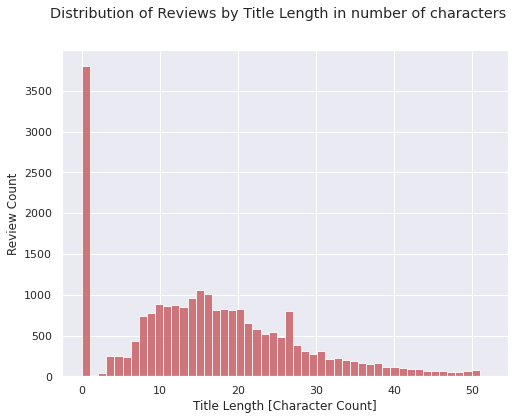

In [21]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'Title Length', 
             data = reviews_df, 
             palette = 'rocket',
             color = 'r', 
             bins = 50)
ax.set_xlabel('Title Length [Character Count]')
ax.set_ylabel('Review Count')
fig.suptitle('Distribution of Reviews by Title Length in number of characters')

Here, we can see the opposite behavior to the review length, where most users either leave no title at all or leave short titles of around 15 characters. From the two histograms we have seen we can ask:

- Is there a relationship between review length and rating?
- Is there a relationship between title length and rating?

In [22]:
#We calculate the percentages of reviews by rating for titles with different lengths

#Titles under 10 characters
perc_under_10 = (100 * reviews_df[reviews_df['Title Length'] <= 10]['Rating'].value_counts()/
                 reviews_df[reviews_df['Title Length'] <= 10]['Rating'].count())

#Titles between 11 and 20 characters
perc_11_to_20 = (100 * reviews_df[(reviews_df['Title Length'] > 10) & (reviews_df['Title Length'] <= 20)]['Rating'].value_counts()/
                reviews_df[(reviews_df['Title Length'] > 10) & (reviews_df['Title Length'] <= 20)]['Rating'].count())

#Titles between 21 and 30 characters
perc_21_to_30 = (100 * reviews_df[(reviews_df['Title Length'] > 20) & (reviews_df['Title Length'] <= 30)]['Rating'].value_counts()/
                reviews_df[(reviews_df['Title Length'] > 20) & (reviews_df['Title Length'] <= 30)]['Rating'].count())

#Titles between 31 and 40 characters
perc_31_to_40 = (100 * reviews_df[(reviews_df['Title Length'] > 30) & (reviews_df['Title Length'] <= 40)]['Rating'].value_counts()/
                reviews_df[(reviews_df['Title Length'] > 30) & (reviews_df['Title Length'] <= 40)]['Rating'].count())

#Titles over 40 characters
perc_over_41 = (100 * reviews_df[reviews_df['Title Length'] > 40]['Rating'].value_counts()/
                reviews_df[reviews_df['Title Length'] > 40]['Rating'].count())

In [23]:
#If you wish to see an example of these percentages, uncomment:
#print(perc_under_10)

Text(0.5, 0.98, 'Percentages of Each Rating Separated by Title Length in Characters')

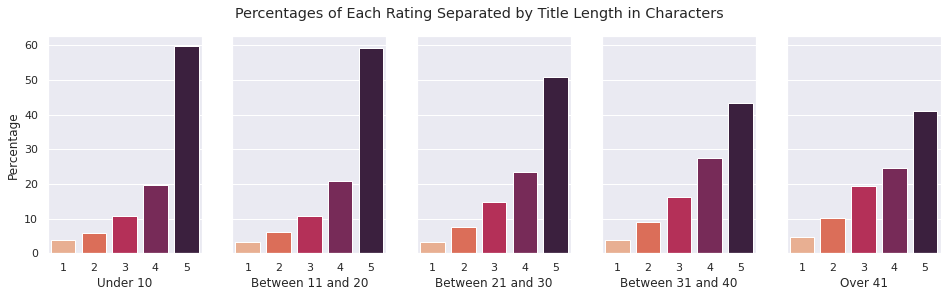

In [24]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (16,4), sharey = True)

sns.barplot(x = perc_under_10.index, y = perc_under_10.values, palette = 'rocket_r', ax = ax1)
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Under 10')

sns.barplot(x = perc_11_to_20.index, y = perc_11_to_20.values, palette = 'rocket_r', ax = ax2)
ax2.set_xlabel('Between 11 and 20')

sns.barplot(x = perc_21_to_30.index, y = perc_21_to_30.values, palette = 'rocket_r', ax = ax3)
ax3.set_xlabel('Between 21 and 30')

sns.barplot(x = perc_31_to_40.index, y = perc_31_to_40.values, palette = 'rocket_r', ax = ax4)
ax4.set_xlabel('Between 31 and 40')

sns.barplot(x = perc_over_41.index, y = perc_over_41.values, palette = 'rocket_r', ax = ax5)
ax5.set_xlabel('Over 41')

fig.suptitle('Percentages of Each Rating Separated by Title Length in Characters')

What the figure above is showing is the percentage of each rating but separated by the length of the review in characters. That is to say, the first plot shows the relative distribution of ratings of 1-5 stars for reviews with titles made of 10 or less characters, the second plot for reviews with titles between 11 and 20 characters long and so on.

From the beginning we've known that users are generally happy with their products because we the mean of the ratings overall is 4.2, and we can still see this positivity in all 5 histograms above. However, we can also notice that the longer the titles are the smaller the portion of 5 star reviews is. This seems to be compensated not with negative reviews but rather, more 3 and 4 star reviews. <br>

If we read a randomly selected sample of these titles we can notice a small trend:

In [25]:
for i in np.random.randint(0, 100, 10):
    print(reviews_df[reviews_df['Title Length'] > 40]['Title'].iloc[i], '\n')

I'd rather pay property taxes than buy this one! 

Lovely, feminine, needs belt for definition 

Beautiful, vintage feel, delicate beadwork 

Not sure what body type this suit is designed for 

Really cute dress, if you can do the handkerchief 

The perfect swimsuit - functional and stunning! 

Not sure what body type this suit is designed for 

Really close to liking it - but planning to return 

Really cute dress, if you can do the handkerchief 

Lovely, feminine, needs belt for definition 



By reading these titles we can see that while most of them generally liked the design of the item, they still had some issues with it. These issues range from the size being too big or too small, the cut not being the correct one for their body type or it looking different from the image on the website. <br>

Although these people aren't angry and probably wouldn't write this retailer off for good, this is still a problem that could be adressed in different ways:

- A more in-depth description of the item's measurements could be provided on the website
- Displaying pictures with more models with different body types wearing different sizes
- Diagrams of the cut could be provided

This could also be an issue with quality assurance, where some people are getting pieces that were longer or shorter than were originally designed to, but this is unlikely. Without knowing who this retailer is, there is no way of knowing. <br>

It's also entirely possible that all of these solutions have been implemented and people are just not reading the item descriptions on the website before buying. <br>

Now let's see if this behavior exists with the actual review text:

In [26]:
#We calculate the percentages of reviews by rating for reviews with different lengths

#Reviews under 100 characters
perc_under_100 = (100 * reviews_df[reviews_df['Review Length'] <= 100]['Rating'].value_counts()/
                 reviews_df[reviews_df['Review Length'] <= 100]['Rating'].count())

#Titles between 101 and 200 characters
perc_101_to_200 = (100 * reviews_df[(reviews_df['Review Length'] > 100) & (reviews_df['Review Length'] <= 200)]['Rating'].value_counts()/
                reviews_df[(reviews_df['Review Length'] > 100) & (reviews_df['Review Length'] <= 200)]['Rating'].count())

#Titles between 201 and 300 characters
perc_201_to_300 = (100 * reviews_df[(reviews_df['Review Length'] > 200) & (reviews_df['Review Length'] <= 300)]['Rating'].value_counts()/
                reviews_df[(reviews_df['Review Length'] > 200) & (reviews_df['Review Length'] <= 300)]['Rating'].count())

#Titles between 301 and 400 characters
perc_301_to_400 = (100 * reviews_df[(reviews_df['Review Length'] > 300) & (reviews_df['Review Length'] <= 400)]['Rating'].value_counts()/
                reviews_df[(reviews_df['Review Length'] > 300) & (reviews_df['Review Length'] <= 400)]['Rating'].count())

#Titles over 401 characters
perc_over_401 = (100 * reviews_df[reviews_df['Review Length'] > 400]['Rating'].value_counts()/
                reviews_df[reviews_df['Review Length'] > 400]['Rating'].count())

Text(0.5, 0.98, 'Percentages of Each Rating Separated by Review Length in Characters')

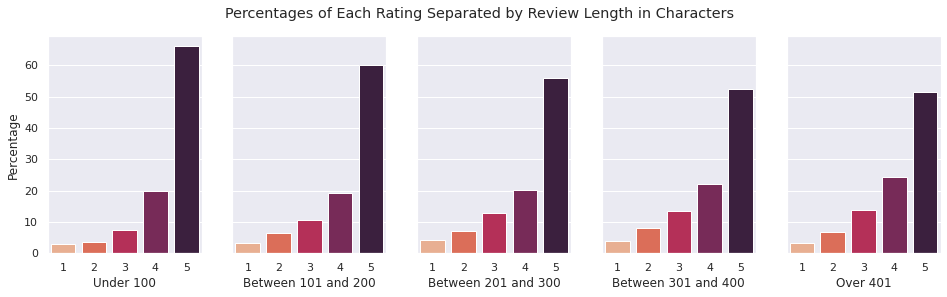

In [27]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (16,4), sharey = True)

sns.barplot(x = perc_under_100.index, y = perc_under_100.values, palette = 'rocket_r', ax = ax1)
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Under 100')

sns.barplot(x = perc_101_to_200.index, y = perc_101_to_200.values, palette = 'rocket_r', ax = ax2)
ax2.set_xlabel('Between 101 and 200')

sns.barplot(x = perc_201_to_300.index, y = perc_201_to_300.values, palette = 'rocket_r', ax = ax3)
ax3.set_xlabel('Between 201 and 300')

sns.barplot(x = perc_301_to_400.index, y = perc_301_to_400.values, palette = 'rocket_r', ax = ax4)
ax4.set_xlabel('Between 301 and 400')

sns.barplot(x = perc_over_401.index, y = perc_over_401.values, palette = 'rocket_r', ax = ax5)
ax5.set_xlabel('Over 401')

fig.suptitle('Percentages of Each Rating Separated by Review Length in Characters')

We can see that yes, the same behavior carries over but to a lesser degree. Overall, the happier someone is with their purchase, the less they have to say, but not by a lot.
Ultimately this makes a lot of sense. After all, most people who are happy with a purchase they made in a brick-and-mortar store will just walk away while someone unhappy with the product is more likely to return and complain or demand a refund. The fact that this behaviour carries over into e-commerce is hardly surprising.

We're going to be trying to predict whether a review is impactful or not from different factors. We're thinking of a review as impactful if 5 or more people thought it was a 'positive' review. The number 5 is purely arbitrary and a better limit could be chosen. <br> 

Being able to predict this would be valuable because a website could then float useful reviews to the top without having them be buried in a pile of useless reviews and without waiting for them to be given multiple thumbs up by many users. It could also help see what types of reviews would be more or less likely to convince someone to buy or not buy an item. <br>

We will add a column on the dataframe called 'Impactful' which will be 1 if the value of that review in the Positive Feedback Count is 5 or more, and 0 if it's under 5.

In [28]:
#First we define a simple function to differentiate between impactful and unimpactful reviews

def is_impactful(feedback):
    if feedback >= 5:
        return 1
    else:
        return 0

In [29]:
#We create the new column
reviews_df['Impactful'] = reviews_df['Positive Feedback Count'].apply(is_impactful)

Let's see if through visualization we can glimpse something from this new column.

Text(0.5, 0.98, 'Distribution of Reviews by Whether They Are Impactful Or Not')

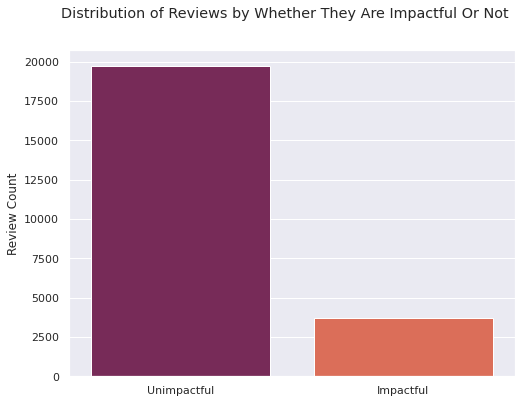

In [30]:
#First we'll just plot the distribution of impactful and unimpactful reviews
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x = 'Impactful', 
             data = reviews_df, 
             palette = 'rocket')
ax.set_xticklabels(['Unimpactful', 'Impactful'])
ax.set_xlabel('')
ax.set_ylabel('Review Count')
fig.suptitle('Distribution of Reviews by Whether They Are Impactful Or Not')

So a majority of reviews are unimpactful by our definition. This makes sense, as a lot of reviews have no text or title, and many reviews probably don't go into detail beyond simple praise like "I love it". Two other explanations are that a lot of reviews will just be buried under other reviews and will never have the chance to make and impact and that, just like a lot of people simply aren't compelled to leave a review title in and of itself, a lot of people  just don't think to hit the 'Like' button. Now let's separate these by whether the reviews recommended the item or not.

Text(0.5, 0.98, 'Distribution of Reviews by Whether They Are Impactful Or Not')

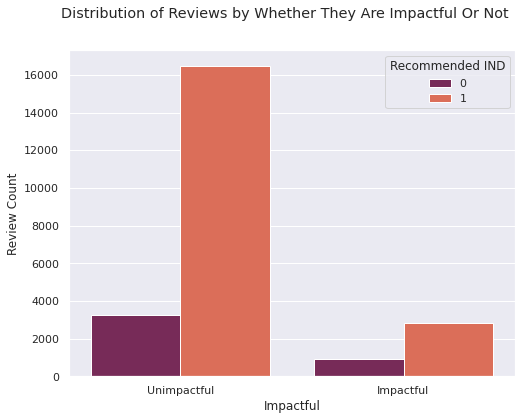

In [31]:
#Now let's separate these by whether the review ends up recommending the item
#First we'll just plot the distribution of impactful and unimpactful reviews
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(x = 'Impactful', 
             data = reviews_df, 
             hue = 'Recommended IND',
             palette = 'rocket')
ax.set_xticklabels(['Unimpactful', 'Impactful'])
ax.set_ylabel('Review Count')
fig.suptitle('Distribution of Reviews by Whether They Are Impactful Or Not')

# Natural Language Processing

We will train 4 different models:
- Predicting whether or not a review is impactful based on its title
- Predicting whether or not a review is impactful based on its review text
- Predicting whether or not a review recommends the item based on its title
- Predicting whether or not a review recommends the item based on its review text

Now, from our exploratory data analysis we know that a large majority of our reviews are both unimpactful and do end up recommending the item they purchased. This means that our data is very unbalanced and any model we train will probably end up overfitting to those states. <br>

Regardless, we will try and train one of these models using the data as is to see if this happens.

In [32]:
#These are important for text pre-processing
import string #From here we get punctuation
from nltk.corpus import stopwords #Stopwords are commong words like "what" that need don't add anything

In [33]:
#These are for the actual model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [34]:
#These are for evaluating our models
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
def text_cleaning(text):
    """
    This is a function that takes a string and removes punctuation and stopwords.
    It returns the words that remain in the form of a list
    """
    no_punct = [char for char in text if char not in string.punctuation]
    
    no_punct = ''.join(no_punct)
    
    return [word for word in no_punct.split() if word.lower() not in stopwords.words('english')]

## Predicting impact based on review title

Our pre-processing will consist of the following steps:
- 1.- Remove review that have no title
- 2.- Remove punctuation from each title
- 3.- Remove stopwords from each title

In [36]:
#First, we will create a new dataframe that only has the reviews with titles
reviews_with_titles = reviews_df.drop(reviews_df[reviews_df['Title Length'] == 0].index)
reviews_with_titles.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Length,Review Length,Impactful
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,23,500,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,16,124,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,16,192,1
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,23,488,0
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,20,496,0


# Model: Predicting Impactfulness Based on Title

In [37]:
X = reviews_with_titles['Title']
y = reviews_with_titles['Impactful']
title_train, title_test, impact_train, impact_test = train_test_split(X, y, test_size = 0.20)

In [38]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_cleaning)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [39]:
pipeline.fit(title_train, impact_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_cleaning at 0x7fc3a15e8a60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [40]:
predictions = pipeline.predict(title_test)

In [41]:
print(confusion_matrix(impact_test, predictions))

[[3272   11]
 [ 644    6]]


In [42]:
print(classification_report(impact_test, predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3283
           1       0.35      0.01      0.02       650

    accuracy                           0.83      3933
   macro avg       0.59      0.50      0.46      3933
weighted avg       0.76      0.83      0.76      3933



So we can see that indeed, the model is predicting most everything as unimpactful. So let's try to balance our data and try again. First, let's see exactly how many reviews are impactful under our definition.

## Data balancing

First, let's check how many reviews are impactful or unimpactful:

In [43]:
reviews_with_titles['Impactful'].value_counts()

0    16417
1     3246
Name: Impactful, dtype: int64

So we have 7488 unimpactful reviews and 3247 impactful reviews. We'll take every impactful review and a randomly selected sample of 3200 unimpactful reviews. This should give us a fairly balanced dataset to retrain our model.

In [44]:
#We take a random sample of 3200 rows of unimpactful reviews
unimpactful_sample = reviews_with_titles[reviews_with_titles['Impactful'] == 0].sample(n = 3200, axis = 0)

#Now we take every single impactful review
impactful_sample = reviews_with_titles[reviews_with_titles['Impactful'] == 1]

#We concatenate both samples on a new dataframe
reviews_with_titles_balanced = pd.concat([unimpactful_sample, impactful_sample])

#We shuffle our new dataframe
reviews_with_titles_balanced = reviews_with_titles_balanced.sample(frac = 1, axis = 0)

In [45]:
reviews_with_titles_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6446 entries, 6049 to 10822
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              6446 non-null   int64 
 1   Age                      6446 non-null   int64 
 2   Title                    6446 non-null   object
 3   Review Text              6446 non-null   object
 4   Rating                   6446 non-null   int64 
 5   Recommended IND          6446 non-null   int64 
 6   Positive Feedback Count  6446 non-null   int64 
 7   Division Name            6446 non-null   object
 8   Department Name          6446 non-null   object
 9   Class Name               6446 non-null   object
 10  Title Length             6446 non-null   int64 
 11  Review Length            6446 non-null   int64 
 12  Impactful                6446 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 705.0+ KB


## Retraining

Now we will try to train our model again with our balanced data

In [46]:
#We begin training again
X = reviews_with_titles_balanced['Title']
y = reviews_with_titles_balanced['Impactful']
title_train, title_test, impact_train, impact_test = train_test_split(X, y, test_size = 0.20)

In [47]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_cleaning)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [48]:
pipeline.fit(title_train, impact_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_cleaning at 0x7fc3a15e8a60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [49]:
predictions = pipeline.predict(title_test)

In [50]:
print(confusion_matrix(impact_test, predictions))

[[374 240]
 [373 303]]


In [51]:
print(classification_report(impact_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55       614
           1       0.56      0.45      0.50       676

    accuracy                           0.52      1290
   macro avg       0.53      0.53      0.52      1290
weighted avg       0.53      0.52      0.52      1290



So, what is happening here? It seems to get half of its predictions right and half of them wrong, or in other words, this is not working in the slightest. The reason for this is that what we're trying to do is inherently difficult to predict. <br>

But what is so difficult about it? Well, determining what makes a review impactful or not is difficult when you only have one variable from which to measure a review's value. This 'Positive Feedback Count' on its own, while its a useful metric, is not enough to determine if a review is truly effectual. We know that a review with a Positive Feedback Count of 120 is truly impactful, but a review with a count of 5? 10? Difficult to say. <br>

A lot of reviews could be truly influential but it's possible that they're not being read by users simply because they're being displayed at the bottom of an item's page. If we had more information on a reviews impact then creating a more accurate Impact label would be easier and a better model could be trained. <br>

In particular I would propose the addition of a view counter for each review to this dataset. That way it would be easier to decide if a review was impactful based on the view-likes ratio. A review with five likes but also a very small amount of views would still be impactful, while a review with five likes but thousands of views? Not so much <br>

For now, we will work with what we have. Let's try and retrain our model by iterating over different definitions of Impactful. Instead of 5 being our limit, we'll train over use multiples of five.

## Retraining our model using different definitions of 'Impactful'

In [52]:
#First, we define a new function

def is_impactful_new(count, limit):
    if count >= limit:
        return 1
    else:
        return 0

In [53]:
new_limits = [5, 10, 15, 20, 25, 30]
confusion_matrixes = []
classification_reports = []

In [54]:
for i in new_limits:
    
    #First we redefine what impactful means
    reviews_with_titles['Impactful'] = reviews_with_titles['Positive Feedback Count'].apply(lambda x: is_impactful_new(x, i))
    
    #Now we rebalance our data
    
    #We count how many reviews are impactful so we can balance our data
    new_sample_size = reviews_with_titles['Impactful'].value_counts()[1]
    
    #We take our sample of unimpactful reviews
    unimpactful_sample = reviews_with_titles[reviews_with_titles['Impactful'] == 0].sample(n = new_sample_size, axis = 0)
    
    #We take all impactful reviews
    impactful_sample = reviews_with_titles[reviews_with_titles['Impactful'] == 1]
    
    #We create and shuffle our new data set
    reviews_with_titles_balanced = pd.concat([unimpactful_sample, impactful_sample])
    reviews_with_titles_balanced = reviews_with_titles_balanced.sample(frac = 1, axis = 0)

    #We begin training again
    X = reviews_with_titles_balanced['Title']
    y = reviews_with_titles_balanced['Impactful']
    title_train, title_test, impact_train, impact_test = train_test_split(X, y, test_size = 0.20)
    
    pipeline = Pipeline([
        ('bow', CountVectorizer(analyzer = text_cleaning)),
        ('tfidf', TfidfTransformer()),
        ('classifier', MultinomialNB())
    ])

    pipeline.fit(title_train, impact_train)
    
    predictions = pipeline.predict(title_test)
    
    confusion_matrixes.append(confusion_matrix(impact_test, predictions))
    
    classification_reports.append(classification_report(impact_test, predictions))

In [55]:
for i in range(len(confusion_matrixes)):
    print('Impactful defined as PFC >= ', new_limits[i])
    print(confusion_matrixes[i])
    print('\n')

Impactful defined as PFC >=  5
[[379 294]
 [270 356]]


Impactful defined as PFC >=  10
[[188  88]
 [153 124]]


Impactful defined as PFC >=  15
[[87 50]
 [61 80]]


Impactful defined as PFC >=  20
[[47 24]
 [38 41]]


Impactful defined as PFC >=  25
[[36 11]
 [37 14]]


Impactful defined as PFC >=  30
[[14 20]
 [12 16]]




In [56]:
for i in range(len(classification_reports)):
    print('Impactful defined as PFC >= ', new_limits[i])
    print(classification_reports[i])
    print('\n')

Impactful defined as PFC >=  5
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       673
           1       0.55      0.57      0.56       626

    accuracy                           0.57      1299
   macro avg       0.57      0.57      0.57      1299
weighted avg       0.57      0.57      0.57      1299



Impactful defined as PFC >=  10
              precision    recall  f1-score   support

           0       0.55      0.68      0.61       276
           1       0.58      0.45      0.51       277

    accuracy                           0.56       553
   macro avg       0.57      0.56      0.56       553
weighted avg       0.57      0.56      0.56       553



Impactful defined as PFC >=  15
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       137
           1       0.62      0.57      0.59       141

    accuracy                           0.60       278
   macro avg       0.60      

So, again, it seems like changing our definition of Impactful doesn't really have an effect on the accuracy of our model. If anything, it makes it worse because by increasing the limit where we differentiate between impactful and unimpactful decreases our sample size on both counts and we have less information to train and evaluate on. Again, to be able to do this, we would need more information on the power of a review to be able to create a better model. At least if we're training only on the title. <br>

Let's move on to our next model.

# Model: Predicting if an Item is Recommended Based on Title

This is a less interesting variable to predict because people are forced to chose whether they recommend an item or not when they write a review on the first place, so we'll always know that from a review regardless. That doesn't mean that no value can be extracted from it, however. For example, if our model predicts that a review will recommend the item but gets it wrong, then that review will be an interesting read because it speaks positively of the item but ends up not recommending it. Why would someone do that? Can we learn something from those reviews? <br>

Like with our previous model, let's begin with balancing our data:

In [57]:
reviews_with_titles['Recommended IND'].value_counts()

1    16088
0     3575
Name: Recommended IND, dtype: int64

In [58]:
not_recommended_sample = reviews_with_titles[reviews_with_titles['Recommended IND'] == 0]
recommended_sample = reviews_with_titles[reviews_with_titles['Recommended IND'] == 1].sample(n = 3500, axis = 0)
reviews_with_titles_balanced = pd.concat([recommended_sample, not_recommended_sample]).sample(frac = 1)

In [59]:
X = reviews_with_titles_balanced['Title']
y = reviews_with_titles_balanced['Recommended IND']
title_train, title_test, recommend_train, recommend_test = train_test_split(X, y, test_size = 0.20)

In [60]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_cleaning)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [61]:
pipeline.fit(title_train, recommend_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_cleaning at 0x7fc3a15e8a60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [62]:
predictions = pipeline.predict(title_test)

In [63]:
print(confusion_matrix(recommend_test, predictions))

[[575 119]
 [139 582]]


In [64]:
print(classification_report(recommend_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       694
           1       0.83      0.81      0.82       721

    accuracy                           0.82      1415
   macro avg       0.82      0.82      0.82      1415
weighted avg       0.82      0.82      0.82      1415



An accuracy between 75% and 85% is not that bad. Again, we might be able to find some insight in the reviews that were predicted as false positives and false negatives. Before we do that, however, let's try to retrain our model using a different classifier than Naive Bayes and see if we can get better results.

## Retraining our model using a Linear Support Vector Machine

In [65]:
not_recommended_sample = reviews_with_titles[reviews_with_titles['Recommended IND'] == 0]
recommended_sample = reviews_with_titles[reviews_with_titles['Recommended IND'] == 1].sample(n = 2200, axis = 0)
reviews_with_titles_balanced = pd.concat([recommended_sample, not_recommended_sample]).sample(frac = 1)

In [66]:
X = reviews_with_titles_balanced['Title']
y = reviews_with_titles_balanced['Recommended IND']
title_train, title_test, recommend_train, recommend_test = train_test_split(X, y, test_size = 0.20)

In [67]:
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_cleaning)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SGDClassifier()),
])

In [68]:
pipeline.fit(title_train, recommend_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_cleaning at 0x7fc3a15e8a60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier())])

In [69]:
predictions_svm = pipeline.predict(title_test)

In [70]:
print(confusion_matrix(recommend_test, predictions_svm))

[[630  97]
 [119 309]]


In [71]:
print(classification_report(recommend_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       727
           1       0.76      0.72      0.74       428

    accuracy                           0.81      1155
   macro avg       0.80      0.79      0.80      1155
weighted avg       0.81      0.81      0.81      1155



We can see that, in reality, there's basically no difference between these classifiers. <br>

For now, we'll work with this model. <br>

So, we will retrieve the titles that were mispredicted and try to see if there is a pattern there.

In [72]:
#First we generate a boolean series that indicate with a True the predictions it got wrong
false_predictions = predictions_svm != recommend_test

In [73]:
#Now we create a dataframe with only these wrong predictions
false_prediction_dataframe = reviews_with_titles_balanced.loc[recommend_test.index][false_predictions]
print(len(false_prediction_dataframe))

216


In [74]:
#Now we will gather every single word in these titles in a list and them count them
all_title_words = []

for i in range(len(false_prediction_dataframe['Title'])):
    for word in false_prediction_dataframe['Title'].iloc[i].lower().split():
        all_title_words.append(word)

In [75]:
print('Most common words in our mispredicted titles')
print(pd.Series(all_title_words).value_counts().head(10))

Most common words in our mispredicted titles
but          44
not          26
for          19
a            18
cute         17
great        16
dress        16
this         15
beautiful    15
the          13
dtype: int64


Some words that stick out in this list are the two common stopwords 'but' and 'not'. Let's take a look at the titles that contain these strings:

In [76]:
counter = 0

print("Titles with the word 'but' in them: \n")
for i in range(len(false_prediction_dataframe['Title'])):
    if 'but' in false_prediction_dataframe['Title'].iloc[i].lower().split():
        counter += 1
        print(false_prediction_dataframe['Title'].iloc[i])
    if counter == 10:
        break
        

counter = 0

print("\n\nTitles with the word 'not' in them: \n")
for i in range(len(false_prediction_dataframe['Title'])):
    if 'not' in false_prediction_dataframe['Title'].iloc[i].lower().split():
        print(false_prediction_dataframe['Title'].iloc[i])
        counter += 1
    if counter == 10:
        break

Titles with the word 'but' in them: 

Nice t, but not super soft
Cute but wide
Gorgeous style but very very itchy
Cute but not right for me
Cute but runs small!
Adorable but wide
Beautiful but fit awkwardly
Beautiful but lots of material
Pretty but runs big!!
Beautiful dress but very large


Titles with the word 'not' in them: 

Nice t, but not super soft
Not for large chests
Cute but not right for me
This is not red!
Pretty, not flattering
Not a rich style...
Very nice, but it's not for tall girls?
Not black
Cute shirt, but not cute on my figure
Not for the large at bust


Reading these titles it pretty clear that most of the buyers have conflicted feelings about their purchase but, even if it's just a few words in the title we can begin to see the potential application of this model as a filter for reviews with constructive criticism <br>

A lot of these titles comment on the nature of the item, making references to the cut, the colors, the size, the material or whatever else. All of this information is valuable to the retailer as they can see what potential issues are turning customers away. The retailer can then use this information to gain insight as to how the can improve the quality of their products or to make a more in-depth user experience on their website by adding more information about the item to avoid user's regretting their purchase because it doesn't fit or it isn't the cut they were expecting.

Ahead is more of the same; training forecasting models to predict if reviews will be impactul or if they will recommend the item they purchased or not using the same metrics as the models we just trained but using the actual review text and not the title. The conclusions will largely be the same as the ones you just read with a couple of details to make note of. 

# Model: Predicting Impactfulness Based on Review Text

In [77]:
reviews_with_text = reviews_df.drop(reviews_df[reviews_df['Review Length'] == 0].index)

In [78]:
reviews_with_text['Impactful'].value_counts()

0    18910
1     3718
Name: Impactful, dtype: int64

In [79]:
#We take a random sample of 3200 rows of unimpactful reviews
unimpactful_sample = reviews_with_text[reviews_with_text['Impactful'] == 0].sample(n = 3700, axis = 0)

#Now we take every single impactful review
impactful_sample = reviews_with_text[reviews_with_text['Impactful'] == 1]

#We concatenate both samples on a new dataframe
reviews_with_text_balanced = pd.concat([unimpactful_sample, impactful_sample])

#We shuffle our new dataframe
reviews_with_text_balanced = reviews_with_text_balanced.sample(frac = 1, axis = 0)

In [80]:
X = reviews_with_text_balanced['Review Text']
y = reviews_with_text_balanced['Impactful']
text_train, text_test, impact_train, impact_test = train_test_split(X, y, test_size = 0.20)

In [81]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_cleaning)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SGDClassifier())
])

In [82]:
pipeline.fit(text_train, impact_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_cleaning at 0x7fc3a15e8a60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier())])

In [83]:
predictions = pipeline.predict(text_test)

In [84]:
print(confusion_matrix(impact_test, predictions))

[[434 319]
 [309 422]]


In [85]:
print(classification_report(impact_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58       753
           1       0.57      0.58      0.57       731

    accuracy                           0.58      1484
   macro avg       0.58      0.58      0.58      1484
weighted avg       0.58      0.58      0.58      1484



# Model: Predicting if an Item is Recommended Based on Review Text

In [86]:
reviews_with_text['Recommended IND'].value_counts()

1    18527
0     4101
Name: Recommended IND, dtype: int64

In [87]:
not_recommended_sample = reviews_with_text[reviews_with_text['Recommended IND'] == 0]
recommended_sample = reviews_with_text[reviews_with_text['Recommended IND'] == 1].sample(n = 4100, axis = 0)
reviews_with_text_balanced = pd.concat([recommended_sample, not_recommended_sample]).sample(frac = 1)

In [88]:
X = reviews_with_text_balanced['Review Text']
y = reviews_with_text_balanced['Recommended IND']
text_train, text_test, recommend_train, recommend_test = train_test_split(X, y, test_size = 0.20)

In [89]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_cleaning)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SGDClassifier())
])

In [90]:
pipeline.fit(text_train, recommend_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_cleaning at 0x7fc3a15e8a60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier())])

In [91]:
predictions_svm = pipeline.predict(text_test)

In [92]:
print(confusion_matrix(recommend_test, predictions_svm))

[[711 112]
 [142 676]]


In [93]:
print(classification_report(recommend_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       823
           1       0.86      0.83      0.84       818

    accuracy                           0.85      1641
   macro avg       0.85      0.85      0.85      1641
weighted avg       0.85      0.85      0.85      1641



In [94]:
false_predictions = predictions_svm != recommend_test

In [95]:
false_prediction_dataframe = reviews_with_text_balanced.loc[recommend_test.index][false_predictions]
print(len(false_prediction_dataframe))

254


In [96]:
#Now we will gather every single word in these reviews in a list and them count them
all_text_words = []

for i in range(len(false_prediction_dataframe['Review Text'])):
    for word in false_prediction_dataframe['Review Text'].iloc[i].lower().split():
        all_text_words.append(word)

In [97]:
print('Most common words in our mispredicted reviews')
print(pd.Series(all_text_words).value_counts().head(10))

Most common words in our mispredicted reviews
the     995
i       722
and     574
a       513
it      466
is      359
this    306
to      288
in      243
was     229
dtype: int64


As these are full-length pieces of writing rather than just titles, the word 'but' no longer makes it to the top 10 of our most common words. This makes sense not only because the words that do appear on the top 10 are all incredibly common stopwords, but because review texts are longer and can express negative or positive emotions in many more different ways rather than just *'PRO' but 'CON'*. <br>

Because of this, we will be looking just at a small sample of reviews that were mispredicted, notice how most do in fact write concrete criticisms of the piece that would be useful to a retailer or a customer, and leave it at that.

In [101]:
for i in range(10):
    print(false_prediction_dataframe['Review Text'].iloc[i])
    print('\n--------------\n')


This top is very pretty, i ordered both xs p and xxs p not knowing (someone wrote the word boxy in the review) - i tried on the xxs p first, and that was fine. did the trick to not look too boxy. teh fabric is stretchy, and soft/comfortable, not scratchy lace. the lining is soft as well. color is ivory and the embroidery is nice and fiery colors. the sleeves are fairly flattering, even on bigger arms. arm hole was just right too, never know with fluttery sleeves. 
for reference i am 115 lbs, 30

--------------

I don't have anything like it in my closet, really excited to wear it

--------------

Just received and sorry to return. i am 5'9" i wear a size 8 i ordered the m/l . it way really big and to wide

--------------

When i saw this online, i wondered why this dress cost so much. i have been keeping my eye on it for some time. loved what i saw, the design and colors and details at the neckline and waist along with pockets but was skeptical. i was waiting for a sale to take a dive 